In [1]:
import pandas as pd


In [5]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
X = data.drop(columns=['target'])
y = data['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [19]:
Y_pred = gaussian.predict(X_test)
print(Y_pred[:20])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
527   62    0   0       124   209    0        1      163      0      0.0   
359   53    0   2       128   216    0        0      115      0      0.0   
447   55    1   0       160   289    0        0      145      1      0.8   
31    50    0   1       120   244    0        1      162      0      1.1   
621   48    1   0       130   256    1        0      150      1      0.0   
590   74    0   1       120   269    0        0      121      1      0.2   
905   64    1   0       120   246    0        0       96      1      2.2   
737   67    1   0       120   229    0        0      129      1      2.6   
76    48    1   2       124   255    1        1      175      0      0.0   
948   70    1   0       145   174    0        1      125      1      2.6   
432   60    0   2       102   318    0        1      160      0      0.0   
70    59    1   0       170   326    0        0      140      1      3.4   
680   42    

In [13]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
accuracy = accuracy_score(y_test,Y_pred)
print("Accuracy: ",accuracy,"\nAccuracy(%): ",accuracy*100)
error=1-accuracy
print("Error Rate: ",error,"\nError rate (%):",error*100)
precision =precision_score(y_test, Y_pred,average='micro')
print("Precision: ", precision,"\nPrecision(%): ", precision%100)
recall = recall_score(y_test, Y_pred,average='micro')
print("Recall: ", recall,"\nRecall(%): ", recall*100)
cm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix: \n",cm)

Accuracy:  0.8 
Accuracy(%):  80.0
Error Rate:  0.19999999999999996 
Error rate (%): 19.999999999999996
Precision:  0.8 
Precision(%):  0.8
Recall:  0.8 
Recall(%):  80.0
Confusion Matrix: 
 [[72 30]
 [11 92]]


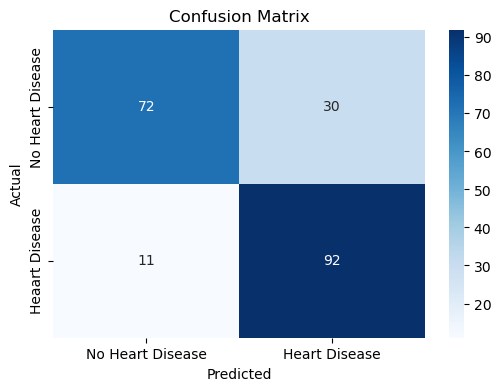

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heaart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
